In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
for category in range(4):
    images = [img_to_array(load_img(f'/content/drive/My Drive/Myocardial Infraction CNN/{category}/{file}', color_mode='grayscale', target_size=(360, 480))) for file in os.listdir(f'/content/drive/My Drive/Myocardial Infraction CNN/{category}')]

    labels = [category] * len(images)

    train_images_category, test_images_category, train_labels_category, test_labels_category = train_test_split(images, labels, test_size=0.2)

    train_images.extend(train_images_category)
    test_images.extend(test_images_category)
    train_labels.extend(train_labels_category)
    test_labels.extend(test_labels_category)

In [ ]:
x_train = np.array(train_images)
x_test = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [ ]:
x_train = x_train.astype('float32')/255.

In [ ]:
x_test = x_test.astype('float32')/255.

In [ ]:
print(x_train.shape)

(741, 360, 480, 1)


In [ ]:
print(x_test.shape)

(187, 360, 480, 1)


In [ ]:
start_time = time.time()


In [ ]:


latent_dim = 32

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Dropout(0.2),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Dropout(0.2),
        layers.Conv2D(1, (3, 3), activation='relu', padding='same')
    ])
    self.decoder = tf.keras.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)


In [ ]:
autoencoder = Autoencoder(latent_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(optimizer=optimizer, loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                          epochs=200,
                          shuffle=True)

Epoch 1/200
24/24 [==============================] - 17s 91ms/step - loss: 0.2237
Epoch 2/200
24/24 [==============================] - 2s 79ms/step - loss: 0.2062
Epoch 3/200
24/24 [==============================] - 2s 78ms/step - loss: 0.1666
Epoch 4/200
24/24 [==============================] - 2s 68ms/step - loss: 0.1051
Epoch 5/200
24/24 [==============================] - 2s 70ms/step - loss: 0.0562
Epoch 6/200
24/24 [==============================] - 2s 68ms/step - loss: 0.0388
Epoch 7/200
24/24 [==============================] - 2s 69ms/step - loss: 0.0350
Epoch 8/200
24/24 [==============================] - 2s 69ms/step - loss: 0.0341
Epoch 9/200
24/24 [==============================] - 2s 70ms/step - loss: 0.0337
Epoch 10/200
24/24 [==============================] - 2s 76ms/step - loss: 0.0335
Epoch 11/200
24/24 [==============================] - 2s 77ms/step - loss: 0.0334
Epoch 12/200
24/24 [==============================] - 2s 76ms/step - loss: 0.0333
Epoch 13/200
24/24 [====

In [ ]:
print(autoencoder.encoder.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 360, 480, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 180, 240, 16)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 180, 240, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 240, 8)       1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 120, 8)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 90, 120, 8)       

In [ ]:
print(autoencoder.decoder.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 90, 120, 8)        80        
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 180, 240, 8)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 180, 240, 8)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 240, 16)      1168      
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 360, 480, 16)      0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 360, 480, 16)     

In [ ]:
batch_size = 1
num_batches = len(x_train)

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_x_train = x_train[start_idx:end_idx]
    latent_features_batch = autoencoder.encoder(batch_x_train).numpy()
    if i == 0:
        latent_features_train = latent_features_batch
    else:
        latent_features_train = np.vstack((latent_features_train, latent_features_batch))


In [ ]:

batch_size = 1
num_batches_test = len(x_test)

for i in range(num_batches_test):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_x_test = x_test[start_idx:end_idx]
    latent_features_batch = autoencoder.encoder(batch_x_test).numpy()
    if i == 0:
        latent_features_test = latent_features_batch
    else:
        latent_features_test = np.vstack((latent_features_test, latent_features_batch))


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"VAE Training and feature extraction took {elapsed_time} seconds.")

VAE Training and feature extraction took 396.22234869003296 seconds.


**CNN**

In [ ]:
start_time = time.time()


In [ ]:
cnn = tf.keras.Sequential([
    layers.Input(shape=(latent_features_train.shape[1],latent_features_train.shape[2],latent_features_train.shape[3])),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

cnn.compile(optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [ ]:

history = cnn.fit(latent_features_train, train_labels, epochs=100, validation_data=(latent_features_test, test_labels))


Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 1.3821 - accuracy: 0.2982 - val_loss: 1.3589 - val_accuracy: 0.2567
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 1.3332 - accuracy: 0.3725 - val_loss: 1.3671 - val_accuracy: 0.2513
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 1.3119 - accuracy: 0.3954 - val_loss: 1.2773 - val_accuracy: 0.4706
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 1.2429 - accuracy: 0.5196 - val_loss: 1.2181 - val_accuracy: 0.4813
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 1.1684 - accuracy: 0.5870 - val_loss: 1.1650 - val_accuracy: 0.6471
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 1.1228 - accuracy: 0.5857 - val_loss: 1.1207 - val_accuracy: 0.4920
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 1.0736 - accuracy: 0.5776 - val_loss: 1.0566 - val_accuracy: 0.5829
Epoch 8/100


6/6 [==============================] - 0s 4ms/step - loss: 0.2635 - accuracy: 0.9465


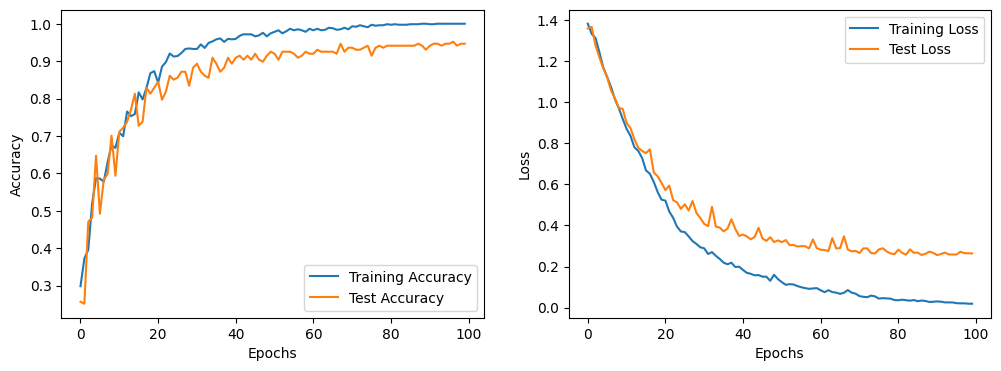

In [ ]:
test_loss, test_acc = cnn.evaluate(latent_features_test, test_labels)

# Plotting the accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions = cnn.predict(latent_features_test)


6/6 [==============================] - 0s 3ms/step


In [ ]:
binary_predictions = np.argmax(predictions, axis=1)


In [ ]:
test_labels = test_labels.reshape(-1, 1)


In [ ]:
conf_matrix = confusion_matrix(test_labels, binary_predictions)


In [ ]:
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


num_classes = len(conf_matrix)
specificity = []
for i in range(num_classes):
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_class = true_negatives / (true_negatives + false_positives)
    specificity.append(specificity_class)

average_specificity = np.mean(specificity)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity for each class: {specificity}")
print(f"Average Specificity: {average_specificity}")

Confusion Matrix:
[[48  0  0  0]
 [ 0 45  2  0]
 [ 0  4 29  2]
 [ 2  0  0 55]]
Accuracy: 0.9465
Precision: [0.96       0.91836735 0.93548387 0.96491228]
Recall: [1.         0.95744681 0.82857143 0.96491228]
F1 Score: [0.97959184 0.9375     0.87878788 0.96491228]
Specificity for each class: [0.9856115107913669, 0.9714285714285714, 0.9868421052631579, 0.9846153846153847]
Average Specificity: 0.9821243930246202


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"CNN took {elapsed_time} seconds.")

CNN took 44.02278399467468 seconds.


**Inception**

In [ ]:
start_time = time.time()

In [ ]:
from tensorflow.keras.applications import InceptionV3


In [ ]:
latent_features_train = np.array([np.repeat(img, 3, axis=-1) for img in latent_features_train])
latent_features_test = np.array([np.repeat(img, 3, axis=-1) for img in latent_features_test])

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(latent_features_train.shape[1], latent_features_train.shape[2], latent_features_train.shape[3]))


87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(64, activation='relu')(x)


output = layers.Dense(4, activation='softmax')(x)

inception_model = Model(inputs=base_model.input, outputs=output)

In [ ]:
inception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

history2 = inception_model.fit(latent_features_train, train_labels, epochs=100, validation_data=(latent_features_test, test_labels))


Epoch 1/100
24/24 [==============================] - 10s 176ms/step - loss: 1.3767 - accuracy: 0.4238 - val_loss: 1.0464 - val_accuracy: 0.5348
Epoch 2/100
24/24 [==============================] - 1s 23ms/step - loss: 0.9210 - accuracy: 0.6235 - val_loss: 1.1079 - val_accuracy: 0.5294
Epoch 3/100
24/24 [==============================] - 1s 24ms/step - loss: 0.8475 - accuracy: 0.6788 - val_loss: 0.8375 - val_accuracy: 0.6845
Epoch 4/100
24/24 [==============================] - 1s 21ms/step - loss: 0.7395 - accuracy: 0.7314 - val_loss: 0.7527 - val_accuracy: 0.7112
Epoch 5/100
24/24 [==============================] - 1s 23ms/step - loss: 0.6322 - accuracy: 0.7787 - val_loss: 0.8480 - val_accuracy: 0.7647
Epoch 6/100
24/24 [==============================] - 1s 22ms/step - loss: 0.6609 - accuracy: 0.7611 - val_loss: 0.7549 - val_accuracy: 0.7701
Epoch 7/100
24/24 [==============================] - 1s 22ms/step - loss: 0.5475 - accuracy: 0.8205 - val_loss: 0.7176 - val_accuracy: 0.7059
Epoc

6/6 [==============================] - 0s 16ms/step - loss: 0.4530 - accuracy: 0.9305


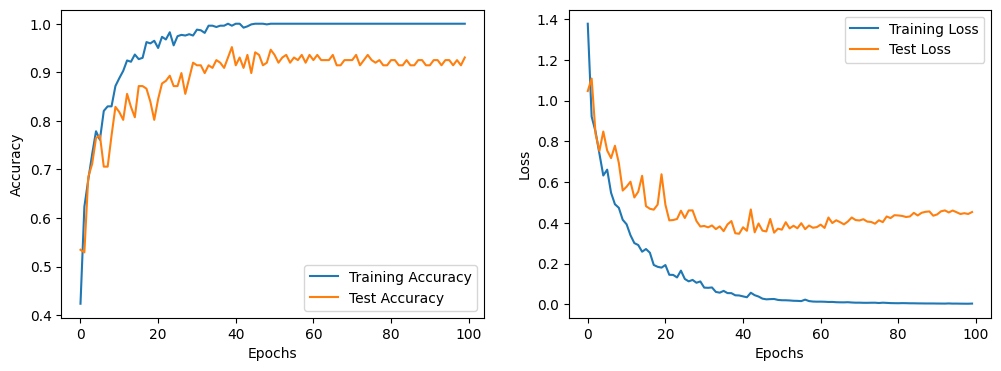

In [ ]:
test_loss, test_acc = inception_model.evaluate(latent_features_test, test_labels)

# Plotting the accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions = inception_model.predict(latent_features_test)


6/6 [==============================] - 2s 17ms/step


In [ ]:
binary_predictions = np.argmax(predictions, axis=1)


In [ ]:
test_labels = test_labels.reshape(-1, 1)


In [ ]:
conf_matrix = confusion_matrix(test_labels, binary_predictions)


In [ ]:
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


num_classes = len(conf_matrix)
specificity = []
for i in range(num_classes):
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_class = true_negatives / (true_negatives + false_positives)
    specificity.append(specificity_class)

average_specificity = np.mean(specificity)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity for each class: {specificity}")
print(f"Average Specificity: {average_specificity}")

Confusion Matrix:
[[48  0  0  0]
 [ 0 38  7  2]
 [ 0  4 31  0]
 [ 0  0  0 57]]
Accuracy: 0.9305
Precision: [1.         0.9047619  0.81578947 0.96610169]
Recall: [1.         0.80851064 0.88571429 1.        ]
F1 Score: [1.         0.85393258 0.84931507 0.98275862]
Specificity for each class: [1.0, 0.9714285714285714, 0.9539473684210527, 0.9846153846153847]
Average Specificity: 0.9774978311162522


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Inception took {elapsed_time} seconds.")

Inception took 82.50450372695923 seconds.


**VGG19**

In [ ]:
start_time = time.time()

In [ ]:
from tensorflow.keras.applications import VGG19


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(latent_features_train.shape[1], latent_features_train.shape[2], latent_features_train.shape[3]))


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
vgg_model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
vgg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = vgg_model.fit(latent_features_train, train_labels, epochs=100, validation_data=(latent_features_test, test_labels))


Epoch 1/100
24/24 [==============================] - 3s 62ms/step - loss: 1.3895 - accuracy: 0.3860 - val_loss: 1.2180 - val_accuracy: 0.4545
Epoch 2/100
24/24 [==============================] - 1s 23ms/step - loss: 1.1363 - accuracy: 0.5250 - val_loss: 1.1300 - val_accuracy: 0.5027
Epoch 3/100
24/24 [==============================] - 1s 21ms/step - loss: 1.0362 - accuracy: 0.5857 - val_loss: 1.0399 - val_accuracy: 0.5455
Epoch 4/100
24/24 [==============================] - 0s 21ms/step - loss: 0.9383 - accuracy: 0.6275 - val_loss: 0.9686 - val_accuracy: 0.5455
Epoch 5/100
24/24 [==============================] - 0s 20ms/step - loss: 0.8785 - accuracy: 0.6410 - val_loss: 0.8246 - val_accuracy: 0.7487
Epoch 6/100
24/24 [==============================] - 1s 23ms/step - loss: 0.8159 - accuracy: 0.6923 - val_loss: 0.8014 - val_accuracy: 0.8021
Epoch 7/100
24/24 [==============================] - 1s 23ms/step - loss: 0.7745 - accuracy: 0.7085 - val_loss: 0.7469 - val_accuracy: 0.7326
Epoch 

6/6 [==============================] - 0s 18ms/step - loss: 0.2420 - accuracy: 0.9465


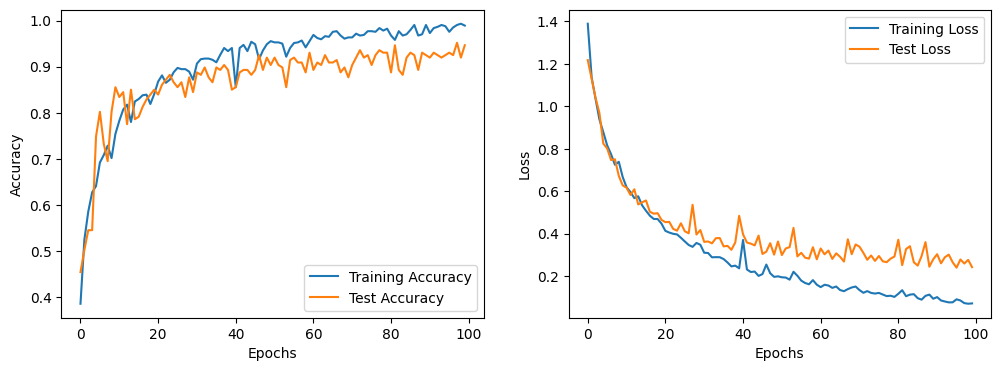

In [ ]:
test_loss, test_acc = vgg_model.evaluate(latent_features_test, test_labels)


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions = vgg_model.predict(latent_features_test)
binary_predictions = np.argmax(predictions, axis=1)
test_labels = test_labels.reshape(-1, 1)
conf_matrix = confusion_matrix(test_labels, binary_predictions)

6/6 [==============================] - 0s 14ms/step


In [ ]:
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diagonal(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


num_classes = len(conf_matrix)
specificity = []
for i in range(num_classes):
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_class = true_negatives / (true_negatives + false_positives)
    specificity.append(specificity_class)

average_specificity = np.mean(specificity)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity for each class: {specificity}")
print(f"Average Specificity: {average_specificity}")

Confusion Matrix:
[[48  0  0  0]
 [ 0 45  2  0]
 [ 0  5 27  3]
 [ 0  0  0 57]]
Accuracy: 0.9465
Precision: [1.         0.9        0.93103448 0.95      ]
Recall: [1.         0.95744681 0.77142857 1.        ]
F1 Score: [1.         0.92783505 0.84375    0.97435897]
Specificity for each class: [1.0, 0.9642857142857143, 0.9868421052631579, 0.9769230769230769]
Average Specificity: 0.9820127241179873


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"VGG took {elapsed_time} seconds.")

VGG took 88.76520037651062 seconds.


**RESTNET152**

In [ ]:
start_time = time.time()

In [ ]:
from tensorflow.keras.applications import ResNet152


In [ ]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(latent_features_train.shape[1], latent_features_train.shape[2], latent_features_train.shape[3]))


234698864/234698864 [==============================] - 8s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
resnet_model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [ ]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(latent_features_train, train_labels, epochs=200, validation_data=(latent_features_test, test_labels))


Epoch 1/200
24/24 [==============================] - 16s 261ms/step - loss: 1.3723 - accuracy: 0.3441 - val_loss: 1.3385 - val_accuracy: 0.3316
Epoch 2/200
24/24 [==============================] - 1s 57ms/step - loss: 1.3188 - accuracy: 0.4291 - val_loss: 1.2919 - val_accuracy: 0.4545
Epoch 3/200
24/24 [==============================] - 1s 51ms/step - loss: 1.2661 - accuracy: 0.4831 - val_loss: 1.2530 - val_accuracy: 0.5294
Epoch 4/200
24/24 [==============================] - 1s 52ms/step - loss: 1.2232 - accuracy: 0.5128 - val_loss: 1.2140 - val_accuracy: 0.4973
Epoch 5/200
24/24 [==============================] - 1s 45ms/step - loss: 1.1849 - accuracy: 0.5142 - val_loss: 1.1724 - val_accuracy: 0.5401
Epoch 6/200
24/24 [==============================] - 1s 46ms/step - loss: 1.1570 - accuracy: 0.5263 - val_loss: 1.2191 - val_accuracy: 0.5134
Epoch 7/200
24/24 [==============================] - 1s 52ms/step - loss: 1.1514 - accuracy: 0.4966 - val_loss: 1.1409 - val_accuracy: 0.5134
Epoc

6/6 [==============================] - 0s 45ms/step - loss: 0.5827 - accuracy: 0.7914


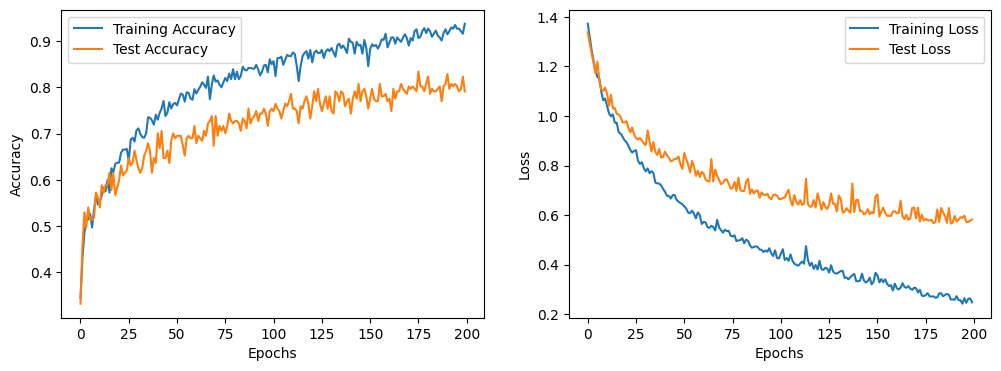

In [ ]:
# Evaluate the model
test_loss, test_acc = resnet_model.evaluate(latent_features_test, test_labels)

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions_resnet = resnet_model.predict(latent_features_test)
binary_predictions_resnet = np.argmax(predictions_resnet, axis=1)
test_labels = test_labels.reshape(-1, 1)
# Calculate metrics
conf_matrix_resnet = confusion_matrix(test_labels, binary_predictions_resnet)
accuracy_resnet = np.trace(conf_matrix_resnet) / np.sum(conf_matrix_resnet)
precision_resnet = np.diagonal(conf_matrix_resnet) / np.sum(conf_matrix_resnet, axis=0)
recall_resnet = np.diagonal(conf_matrix_resnet) / np.sum(conf_matrix_resnet, axis=1)
f1_score_resnet = 2 * (precision_resnet * recall_resnet) / (precision_resnet + recall_resnet)

# Specificity
num_classes_resnet = len(conf_matrix_resnet)
specificity_resnet = []
for i in range(num_classes_resnet):
    true_negatives_resnet = np.sum(conf_matrix_resnet) - np.sum(conf_matrix_resnet[i, :]) - np.sum(conf_matrix_resnet[:, i]) + conf_matrix_resnet[i, i]
    false_positives_resnet = np.sum(conf_matrix_resnet[:, i]) - conf_matrix_resnet[i, i]
    specificity_class_resnet = true_negatives_resnet / (true_negatives_resnet + false_positives_resnet)
    specificity_resnet.append(specificity_class_resnet)

average_specificity_resnet = np.mean(specificity_resnet)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_resnet)

# Print the metrics
print(f"Accuracy: {accuracy_resnet:.4f}")
print(f"Precision: {precision_resnet}")
print(f"Recall: {recall_resnet}")
print(f"F1 Score: {f1_score_resnet}")
print(f"Specificity for each class: {specificity_resnet}")
print(f"Average Specificity: {average_specificity_resnet}")

6/6 [==============================] - 3s 32ms/step
Confusion Matrix:
[[39  6  3  0]
 [ 0 40  7  0]
 [ 1  5 22  7]
 [ 0  4  6 47]]
Accuracy: 0.7914
Precision: [0.975      0.72727273 0.57894737 0.87037037]
Recall: [0.8125     0.85106383 0.62857143 0.8245614 ]
F1 Score: [0.88636364 0.78431373 0.60273973 0.84684685]
Specificity for each class: [0.9928057553956835, 0.8928571428571429, 0.8947368421052632, 0.9461538461538461]
Average Specificity: 0.931638396627984


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"RESTNET took {elapsed_time} seconds.")

RESTNET took 293.2278878688812 seconds.


RESNET 50

In [ ]:
start_time = time.time()

In [ ]:
from tensorflow.keras.applications import ResNet50


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(latent_features_train.shape[1], latent_features_train.shape[2], latent_features_train.shape[3]))


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
resnet_model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(latent_features_train, train_labels, epochs=200, validation_data=(latent_features_test, test_labels))


Epoch 1/200
24/24 [==============================] - 9s 70ms/step - loss: 1.3919 - accuracy: 0.2713 - val_loss: 1.3370 - val_accuracy: 0.3155
Epoch 2/200
24/24 [==============================] - 1s 21ms/step - loss: 1.3256 - accuracy: 0.3239 - val_loss: 1.3168 - val_accuracy: 0.3690
Epoch 3/200
24/24 [==============================] - 1s 23ms/step - loss: 1.2760 - accuracy: 0.4575 - val_loss: 1.2800 - val_accuracy: 0.3850
Epoch 4/200
24/24 [==============================] - 1s 21ms/step - loss: 1.2452 - accuracy: 0.5074 - val_loss: 1.2387 - val_accuracy: 0.4652
Epoch 5/200
24/24 [==============================] - 1s 39ms/step - loss: 1.2060 - accuracy: 0.4791 - val_loss: 1.2215 - val_accuracy: 0.4225
Epoch 6/200
24/24 [==============================] - 1s 36ms/step - loss: 1.1877 - accuracy: 0.4291 - val_loss: 1.1905 - val_accuracy: 0.5027
Epoch 7/200
24/24 [==============================] - 1s 31ms/step - loss: 1.1369 - accuracy: 0.5574 - val_loss: 1.1636 - val_accuracy: 0.5455
Epoch 

6/6 [==============================] - 0s 16ms/step - loss: 0.5684 - accuracy: 0.8235


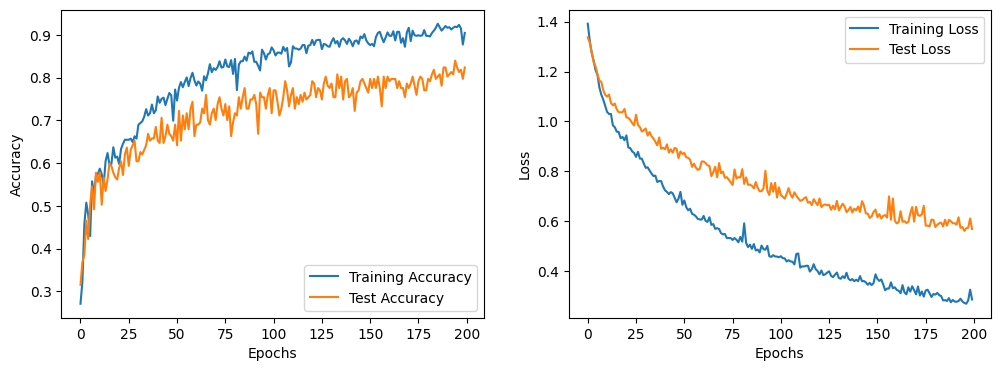

In [ ]:
# Evaluate the model
test_loss, test_acc = resnet_model.evaluate(latent_features_test, test_labels)

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions_resnet = resnet_model.predict(latent_features_test)
binary_predictions_resnet = np.argmax(predictions_resnet, axis=1)
test_labels = test_labels.reshape(-1, 1)
# Calculate metrics
conf_matrix_resnet = confusion_matrix(test_labels, binary_predictions_resnet)
accuracy_resnet = np.trace(conf_matrix_resnet) / np.sum(conf_matrix_resnet)
precision_resnet = np.diagonal(conf_matrix_resnet) / np.sum(conf_matrix_resnet, axis=0)
recall_resnet = np.diagonal(conf_matrix_resnet) / np.sum(conf_matrix_resnet, axis=1)
f1_score_resnet = 2 * (precision_resnet * recall_resnet) / (precision_resnet + recall_resnet)

# Specificity
num_classes_resnet = len(conf_matrix_resnet)
specificity_resnet = []
for i in range(num_classes_resnet):
    true_negatives_resnet = np.sum(conf_matrix_resnet) - np.sum(conf_matrix_resnet[i, :]) - np.sum(conf_matrix_resnet[:, i]) + conf_matrix_resnet[i, i]
    false_positives_resnet = np.sum(conf_matrix_resnet[:, i]) - conf_matrix_resnet[i, i]
    specificity_class_resnet = true_negatives_resnet / (true_negatives_resnet + false_positives_resnet)
    specificity_resnet.append(specificity_class_resnet)

average_specificity_resnet = np.mean(specificity_resnet)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_resnet)

# Print the metrics
print(f"Accuracy: {accuracy_resnet:.4f}")
print(f"Precision: {precision_resnet}")
print(f"Recall: {recall_resnet}")
print(f"F1 Score: {f1_score_resnet}")
print(f"Specificity for each class: {specificity_resnet}")
print(f"Average Specificity: {average_specificity_resnet}")

6/6 [==============================] - 2s 16ms/step
Confusion Matrix:
[[48  0  0  0]
 [ 2 34  8  3]
 [ 1  2 27  5]
 [ 4  0  8 45]]
Accuracy: 0.8235
Precision: [0.87272727 0.94444444 0.62790698 0.8490566 ]
Recall: [1.         0.72340426 0.77142857 0.78947368]
F1 Score: [0.93203883 0.81927711 0.69230769 0.81818182]
Specificity for each class: [0.9496402877697842, 0.9857142857142858, 0.8947368421052632, 0.9384615384615385]
Average Specificity: 0.9421382385127179


In [ ]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"RESTNET50 took {elapsed_time} seconds.")

RESTNET50 took 148.7681953907013 seconds.
